# COVID-19 Growth
Adapted from https://nextjournal.com/mpd/covid-19-growth-by-state-us

In [56]:
# Standard libraries and options
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

from matplotlib.ticker import ScalarFormatter
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns

In [2]:
#pd.describe_option('display')

In [3]:
# Download states by day as JSON. Skip this cell to avoid making more requests than needed.  
states_url = "https://covidtracking.com/api/states/daily"
r = requests.get(states_url)

In [4]:
# Convert JSON to pandas DataFrame.
states_df = pd.DataFrame(r.json())
states_df['date'] = pd.to_datetime(states_df.date, format="%Y%m%d")
states_df.drop(['checkTimeEt', 'commercialScore', 'dataQualityGrade', 'dateChecked', 'dateModified', 'grade', 'hash', 'positiveScore', 'score'], axis = 1, inplace=True)
states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,negativeRegularScore,negativeScore
0,2020-07-09,AK,"1,272.00","134,472.00",nan,28.00,nan,nan,nan,0.00,...,46,2297,135744,135744,2343,135744,0,0,0,0
1,2020-07-09,AL,"49,174.00","421,330.00",nan,"1,125.00","3,039.00",nan,877.00,nan,...,2212,0,470504,470504,2212,470504,10,33,0,0
2,2020-07-09,AR,"26,052.00","338,609.00",nan,394.00,"1,705.00",nan,nan,82.00,...,1540,9849,364661,364661,11389,364661,8,50,0,0
3,2020-07-09,AS,0.00,816.00,nan,nan,nan,nan,nan,nan,...,0,0,816,816,0,816,0,0,0,0
4,2020-07-09,AZ,"112,671.00","540,390.00",nan,"3,437.00","5,526.00",861.00,nan,575.00,...,4057,7934,653061,653061,11991,653061,75,139,0,0


In [5]:
states_df.describe().T

,count,mean,std,min,25%,50%,75%,max
positive,"7,058.00","22,247.23","48,982.20",0.00,466.00,"4,837.50","22,016.00","399,513.00"
negative,"6,917.00","196,936.96","416,245.84",0.00,"8,724.00","58,676.00","206,995.00","4,781,935.00"
pending,982.00,"1,158.19","6,142.26",0.00,14.00,102.00,477.00,"64,400.00"
hospitalizedCurrently,"4,462.00",943.70,"1,832.29",0.00,94.00,373.00,902.75,"18,825.00"
hospitalizedCumulative,"3,631.00","4,643.01","13,191.21",0.00,253.00,"1,110.00","3,638.00","89,995.00"
inIcuCurrently,"2,298.00",403.05,676.05,0.00,67.00,158.00,402.75,"5,225.00"
inIcuCumulative,961.00,677.80,588.13,6.00,188.00,503.00,999.00,"2,519.00"
onVentilatorCurrently,"2,005.00",199.34,308.49,0.00,26.00,86.00,217.00,"2,425.00"
onVentilatorCumulative,338.00,173.01,111.75,2.00,101.00,140.50,198.75,490.00
recovered,"4,070.00","9,607.73","17,150.89",2.00,563.00,"2,536.00","8,865.75","118,326.00"


In [6]:
states_df.info() # provides more info than states_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      7073 non-null   datetime64[ns]
 1   state                     7073 non-null   object        
 2   positive                  7058 non-null   float64       
 3   negative                  6917 non-null   float64       
 4   pending                   982 non-null    float64       
 5   hospitalizedCurrently     4462 non-null   float64       
 6   hospitalizedCumulative    3631 non-null   float64       
 7   inIcuCurrently            2298 non-null   float64       
 8   inIcuCumulative           961 non-null    float64       
 9   onVentilatorCurrently     2005 non-null   float64       
 10  onVentilatorCumulative    338 non-null    float64       
 11  recovered                 4070 non-null   float64       
 12  lastUpdateEt        

In [7]:
def get_std_formats (df, int_format = '{0:,.0f}', float_format =  '{:,.2f}', date_format = '{:%m/%d/%Y}') :

    dt_map = {'datetime64[ns]' : date_format, 'float64' : float_format, 'int64': int_format}

    return {n : dt_map[df.dtypes[n].name] for n in df.dtypes.index if df.dtypes[n].name in ([
    'datetime64[ns]', 'float64', 'int64'])}


In [8]:
states_fmts = get_std_formats(states_df)
states_df.tail().style.format(states_fmts)
#states_fmts

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,negativeRegularScore,negativeScore
7068,01/26/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
7069,01/25/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
7070,01/24/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
7071,01/23/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
7072,01/22/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0


# NJ Adjustment

The COVID Tracking Project [notes](https://covidtracking.com/data/state/new-jersey) that
"on June 25th, New Jersey reported 1854 probable deaths that occured in the past. This causes a perecived increase in the daily number of deaths."

We will subtract these for the time being, but it would be better to reallocate to past dates.



In [9]:
condition = (states_df['date']=='2020-06-25') & (states_df['state']=='NJ') 
adj_nj_incr = states_df.loc[condition]['deathIncrease'] - 1854
adj_nj_incr

818    23
Name: deathIncrease, dtype: int64

In [10]:
states_df.loc[condition, ['deathIncrease']] = adj_nj_incr
#states_df.loc[condition]

# Sort and add moving averages

In [11]:
# Sort values for moving average over state and date and calculate moving averages.
states_df.sort_values(by=['state', 'date'], inplace=True)
states_df['percentPositive'] = states_df['positiveIncrease'] / states_df['totalTestResultsIncrease']  
movingAvg7Day = lambda x : x.rolling(7).mean()
states_avg = states_df.groupby('state', group_keys=False)['deathIncrease', 'positiveIncrease','percentPositive', 'hospitalizedCurrently', 'hospitalizedIncrease'].apply(movingAvg7Day)
#states_avg.tail()

In [12]:
# add the calculated moving averages into states_df
states_df = states_df.join(states_avg, rsuffix='Average')
#states_df.tail(5)

In [13]:
case_cols = ['date','positiveIncrease', 'positiveIncreaseAverage', 'deathIncrease', 'deathIncreaseAverage', 'percentPositive', 'percentPositiveAverage', 'hospitalizedCurrently', 'hospitalizedCurrentlyAverage', 'hospitalizedIncrease', 'hospitalizedIncreaseAverage']

nj_cases = states_df.loc[states_df['state']=='NJ', case_cols]

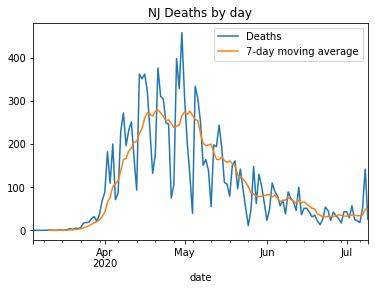

In [14]:
nj_cases.plot(x='date', y=['deathIncrease', 'deathIncreaseAverage'], title='NJ Deaths by day',label=['Deaths', '7-day moving average'])

In [15]:
nj_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
370,2020-07-03,386,308.29,57,35.71,0.02,0.02,"1,028.00","1,031.71",73,66.00
314,2020-07-04,291,308.57,25,34.43,0.01,0.02,983.00,"1,014.57",19,58.57
258,2020-07-05,369,317.14,22,33.71,0.01,0.01,917.00,"1,000.71",4,56.57
202,2020-07-06,209,334.14,18,33.86,0.01,0.02,861.00,984.00,0,55.71
146,2020-07-07,267,315.86,52,35.14,0.02,0.02,903.00,971.29,9,57.00
90,2020-07-08,161,301.57,142,49.29,0.01,0.02,935.00,950.57,180,53.14
34,2020-07-09,201,269.14,25,48.71,0.01,0.01,963.00,941.43,79,52.00


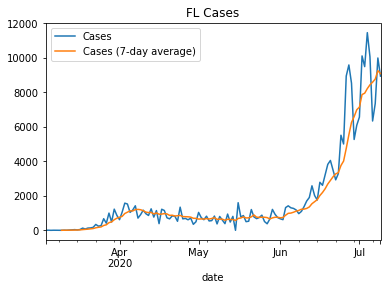

In [16]:
fl_cases = states_df.loc[states_df['state']=='FL', case_cols]
fl_cases.plot(x='date', y=[ 'positiveIncrease', 'positiveIncreaseAverage'], title='FL Cases', label=['Cases', 'Cases (7-day average)'])

In [17]:
fl_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
346,2020-07-03,9488,"7,947.71",67,45.86,0.19,0.18,nan,nan,341,216.29
290,2020-07-04,11458,"8,215.29",18,44.86,0.18,0.18,nan,nan,245,229.71
234,2020-07-05,10059,"8,433.71",29,44.86,0.19,0.19,nan,nan,161,237.29
178,2020-07-06,6336,"8,586.57",48,47.71,0.19,0.19,nan,nan,151,243.00
122,2020-07-07,7347,"8,765.71",63,48.43,0.21,0.19,nan,nan,381,264.86
66,2020-07-08,9989,"9,255.14",48,48.71,0.20,0.19,nan,nan,335,277.57
10,2020-07-09,8935,"9,087.43",120,56.14,0.24,0.20,nan,nan,411,289.29


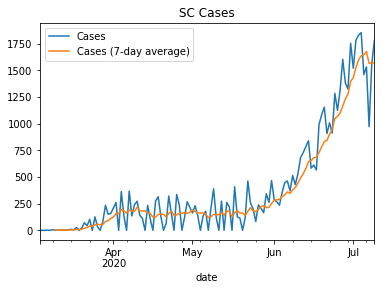

In [18]:
sc_cases = states_df.loc[states_df['state']=='SC', case_cols]
sc_cases.plot(x='date', y=[ 'positiveIncrease', 'positiveIncreaseAverage'], title='SC Cases', label=['Cases', 'Cases (7-day average)'])

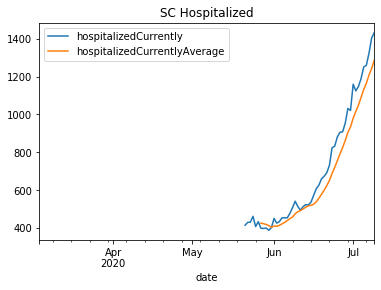

In [19]:
sc_cases.plot(x='date', y=[ 'hospitalizedCurrently', 'hospitalizedCurrentlyAverage'], title='SC Hospitalized')

In [20]:
sc_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
380,2020-07-03,1831,"1,599.57",9,14.14,0.24,0.16,"1,148.00","1,049.71",28,37.14
324,2020-07-04,1854,"1,635.29",20,14.57,0.16,0.17,"1,190.00","1,090.00",0,37.14
268,2020-07-05,1461,"1,646.71",7,14.86,0.14,0.17,"1,251.00","1,132.43",0,37.14
212,2020-07-06,1533,"1,676.57",7,15.29,0.17,0.17,"1,260.00","1,165.00",0,37.14
156,2020-07-07,972,"1,564.71",19,15.29,0.18,0.17,"1,324.00","1,208.29",208,33.71
100,2020-07-08,1557,"1,570.00",38,16.86,0.18,0.18,"1,404.00","1,243.14",0,33.71
44,2020-07-09,1782,"1,570.00",21,17.29,0.18,0.18,"1,433.00","1,287.14",0,33.71


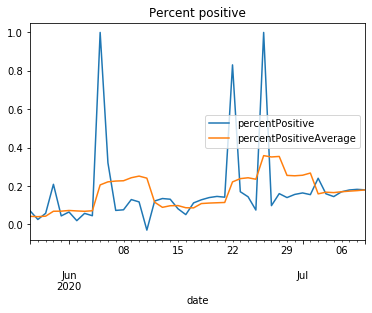

In [21]:
sc_cases[sc_cases['date']>= '2020-05-27'].plot(x='date', y=[ 'percentPositive', 'percentPositiveAverage'], title='Percent positive')

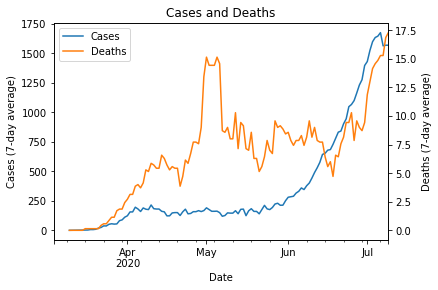

In [22]:
ax = sc_cases.plot(x='date', y='positiveIncreaseAverage', title='Cases and Deaths', label='Cases')
sc_cases.plot(x='date', y='deathIncreaseAverage', ax=ax, secondary_y=True, label='Deaths', mark_right=False)
ax.set(xlabel="Date", ylabel="Cases (7-day average)")
_ = ax.right_ax.set_ylabel('Deaths (7-day average)')


In [23]:
def state_plot (df, state) :
    st_df = df[df['state']==state]
    ax = st_df.plot(x='date', y='positiveIncreaseAverage', title= state +' Cases and Deaths', label='Cases')
    st_df.plot(x='date', y='deathIncreaseAverage', ax=ax, secondary_y=True, label='Deaths', mark_right=False)
    ax.set(xlabel="Date", ylabel="Cases (7-day average)")
    _ = ax.right_ax.set_ylabel('Deaths (7-day average)')


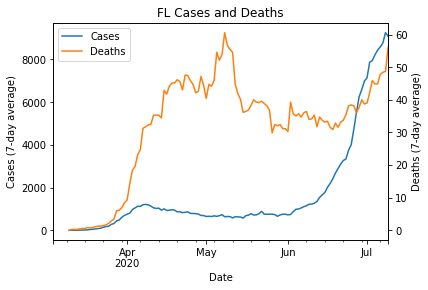

In [24]:
state_plot(states_df, 'FL')

# Population adjustment

Latest census CSV contains FIPS code for state and 2019 estimates.

`http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#`

Source:[State Population Totals and Components of Change: 2010-2019](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage)

In [50]:
# source
#pop_url = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#'
# local copy, use on VPN
pop_url = 'nst-est2019-alldata.csv'
pop_df = pd.read_csv(pop_url, dtype={'STATE': 'object'})
# We only want the state-level rows (40) and 2019 data. 
pop_df = pop_df.loc[(pop_df['SUMLEV'] == 40), ['STATE', 'NAME','POPESTIMATE2019']]

# rename state to fips for merge
pop_df.columns = ['fips', 'stateName', 'population']


In [37]:
states_df = states_df.merge(pop_df, on=['fips'])
states_df['positiveAvgPerCap'] = states_df['positiveIncreaseAverage'] / (states_df['population'] / 1000000)
states_df['deathAvgPerCap'] = states_df['deathIncreaseAverage'] / (states_df['population'] / 1000000)
states_df['hospitalizedPerCap'] = states_df['hospitalizedCurrentlyAverage'] / (states_df['population'] / 1000000)
states_df['hospIncrPerCap'] = states_df['hospitalizedIncreaseAverage'] / (states_df['population'] / 1000000)


In [38]:
# Get the latest date in the data set.
latest = states_df['date'].max()
latest

Timestamp('2020-07-09 00:00:00')

In [39]:
#  %%timeit=2.49 ms 
latest_df = states_df.loc[states_df['date'] == latest]

In [40]:
def state_plot_percap (df, state) :
    st_df = df[df['state']==state]
    ax = st_df.plot(x='date', y='positiveAvgPerCap', title= state +' cases and deaths per million', label='Cases')
    st_df.plot(x='date', y='deathAvgPerCap', ax=ax, secondary_y=True, label='Deaths', mark_right=False)
    ax.set(xlabel="Date", ylabel="Cases (7-day average)")
    _ = ax.right_ax.set_ylabel('Deaths (7-day average)')

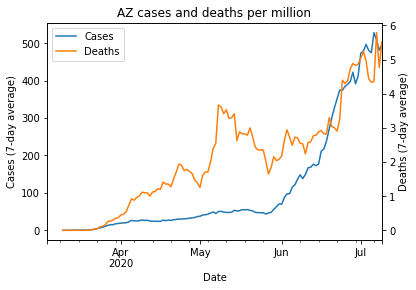

In [57]:
state_plot_percap(states_df, 'AZ')

In [103]:
def state_plot_hospzn_percap (df, state) :
    st_df = df[df['state']==state]
    ax = st_df.plot(x='date', y='hospIncrPerCap', title= state +' hospitalizations per million', label=None)
    ax.set(xlabel="Date", ylabel="Hospitalizations (7-day average)")


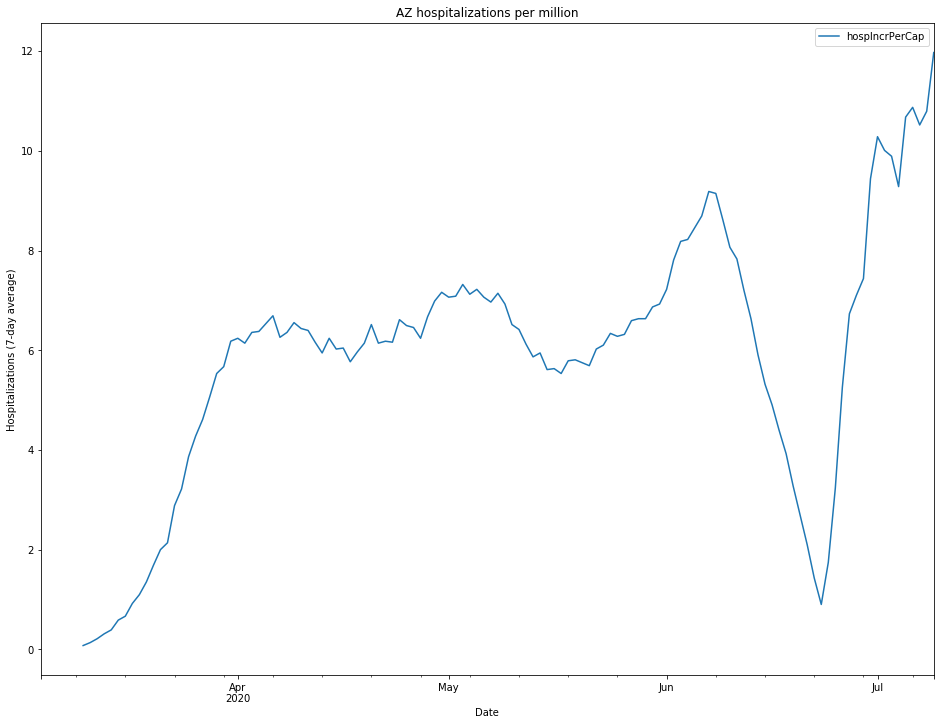

In [106]:
state_plot_hospzn_percap(states_df, 'AZ')

In [45]:
latest_df[['stateName','positiveAvgPerCap', 'population', 'positiveIncreaseAverage', 'positiveIncrease']
    ].nlargest(10, 'positiveAvgPerCap').sort_values('positiveAvgPerCap', ascending=False)

,stateName,positiveAvgPerCap,population,positiveIncreaseAverage,positiveIncrease
504,Arizona,495.50,7278717,"3,606.57",4057
1265,Florida,423.11,21477737,"9,087.43",8935
2400,Louisiana,320.61,4648794,"1,490.43",1843
5301,South Carolina,304.93,5148714,"1,570.00",1782
5681,Texas,267.87,28995881,"7,767.00",9782
250,Alabama,264.06,4903185,"1,294.71",2212
1393,Georgia,255.89,10617423,"2,716.86",2837
4292,Nevada,239.83,3080156,738.71,603
3279,Mississippi,231.41,2976149,688.71,703
5553,Tennessee,223.85,6829174,"1,528.71",1605


In [46]:
latest_df[['stateName','positiveIncreaseAverage', 'positiveIncrease']
         ].nlargest(20, 'positiveIncreaseAverage').sort_values('positiveIncreaseAverage', ascending=False)

,stateName,positiveIncreaseAverage,positiveIncrease
1265,Florida,"9,087.43",8935
632,California,"8,043.43",7031
5681,Texas,"7,767.00",9782
504,Arizona,"3,606.57",4057
1393,Georgia,"2,716.86",2837
3532,North Carolina,"1,601.00",2039
5301,South Carolina,"1,570.00",1782
5553,Tennessee,"1,528.71",1605
2400,Louisiana,"1,490.43",1843
250,Alabama,"1,294.71",2212


In [74]:
latest_df['hospPcRank'] = latest_df['hospIncrPerCap'].rank(method='first', ascending=False)  


latest_df[['hospPcRank', 'stateName','hospIncrPerCap', 'population', 'hospitalizedCurrently']
         ].nlargest(20, 'hospIncrPerCap').sort_values('hospIncrPerCap', ascending=False)

,hospPcRank,stateName,hospIncrPerCap,population,hospitalizedCurrently
1393,1.00,Georgia,14.88,10617423,"2,322.00"
1265,2.00,Florida,13.47,21477737,nan
504,3.00,Arizona,11.97,7278717,"3,437.00"
4165,4.00,New Mexico,11.79,2096829,154.00
376,5.00,Arkansas,10.79,3017804,394.00
5933,6.00,Virginia,10.66,8535519,956.00
4672,7.00,Oklahoma,10.04,3956971,453.00
3279,8.00,Mississippi,9.89,2976149,941.00
5806,9.00,Utah,8.69,3205958,207.00
4547,10.00,Ohio,8.05,11689100,890.00


In [79]:

hosp_df = latest_df[['stateName','hospIncrPerCap', 'population', 'hospitalizedIncreaseAverage', 'hospitalizedIncrease', 'state', 'hospPcRank']
         ].nlargest(20, 'hospIncrPerCap').sort_values('hospIncrPerCap', ascending=False)
hosp_df

,stateName,hospIncrPerCap,population,hospitalizedIncreaseAverage,hospitalizedIncrease,state,hospPcRank
1393,Georgia,14.88,10617423,158.00,106,GA,1.00
1265,Florida,13.47,21477737,289.29,411,FL,2.00
504,Arizona,11.97,7278717,87.14,139,AZ,3.00
4165,New Mexico,11.79,2096829,24.71,45,NM,4.00
376,Arkansas,10.79,3017804,32.57,50,AR,5.00
5933,Virginia,10.66,8535519,91.00,39,VA,6.00
4672,Oklahoma,10.04,3956971,39.71,89,OK,7.00
3279,Mississippi,9.89,2976149,29.43,49,MS,8.00
5806,Utah,8.69,3205958,27.86,22,UT,9.00
4547,Ohio,8.05,11689100,94.14,81,OH,10.00


In [80]:
#Nicely-formatted table

hosp_disp_df = hosp_df[['stateName','hospIncrPerCap', 'population', 'hospitalizedIncreaseAverage', 'hospitalizedIncrease']].rename({'stateName' : 'State',  'hospIncrPerCap' : 'Hospitalizations per mil., 7-day avg.' ,
               'population' : 'Population', 'hospitalizedIncreaseAverage' : 'Hospitalizations, 7-day avg.', 
               'hospitalizedIncrease' : 'Hospitalizations'}, axis=1)
hosp_disp_df.index = np.arange(1, len(hosp_df) + 1)

hosp_disp_df.style.\
    format(get_std_formats(hosp_disp_df)).\
    set_properties(subset=['State'], **{'text-align': 'left'}).\
    set_table_styles([dict(selector="th",props=[('max-width', '10em'), ('vertical-align' , 'bottom')]),
                     dict(selector="thead tr:first-of-type th:nth-of-type(2)",props=[('text-align', 'left')])])
#hosp_df.to_html()


,State,"Hospitalizations per mil., 7-day avg.",Population,"Hospitalizations, 7-day avg.",Hospitalizations
1,Georgia,14.88,"10,617,423",158.00,106
2,Florida,13.47,"21,477,737",289.29,411
3,Arizona,11.97,"7,278,717",87.14,139
4,New Mexico,11.79,"2,096,829",24.71,45
5,Arkansas,10.79,"3,017,804",32.57,50
6,Virginia,10.66,"8,535,519",91.00,39
7,Oklahoma,10.04,"3,956,971",39.71,89
8,Mississippi,9.89,"2,976,149",29.43,49
9,Utah,8.69,"3,205,958",27.86,22
10,Ohio,8.05,"11,689,100",94.14,81


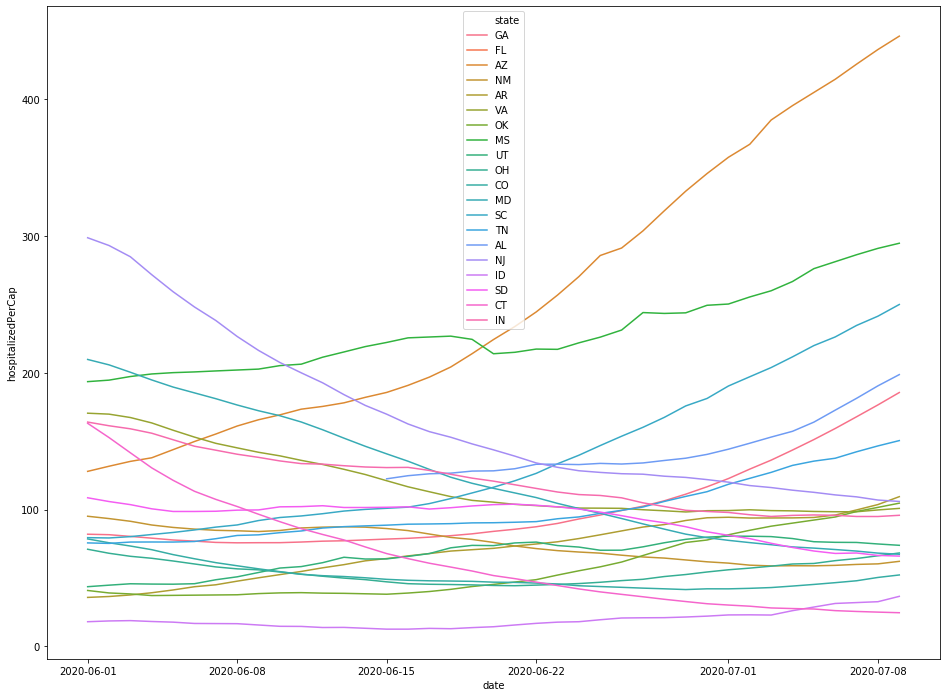

In [96]:
hosp_df['state']
topHosp_df = states_df[states_df['date']>='2020-06-01'].merge(hosp_df[['state', 'hospPcRank']], on='state') [['date','state','hospitalizedPerCap','stateName', 'hospPcRank']]
#topHosp_df
sns.lineplot(x='date', y='hospitalizedPerCap', data=topHosp_df, hue='state', hue_order = hosp_df['state'])

